In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [36]:
#definir le nombre de points
n = 1000000
p = np.zeros(n)


# masse/densite
M = 12*2e30
#rho = 1410*np.ones(n)
rho = 1e14*np.ones(n)#


#sommet est a x = 0, le centre a n

#constants
G = 6.67e-11
c = 299792458
r = np.linspace(R,0,n)
dr = R/n

In [3]:
def f(r,p,rho):
    return ((rho+p/c**2)*(G*M*r/R**3)/(1-2*G*M*r/(R**3*c**2))*(1+(4*np.pi*p*R**3)/(M*c**2)))

In [4]:
for i in range(0,n-1):
    p[i+1] = p[i]+1/2*dr*(f(r[i],p[i],rho[i])+f(r[i]+dr,p[i]+dr*f(r[i],p[i],rho[i]),rho[i]))

In [102]:
def P_theo(M,R,n):
    G = 6.67e-11
    c = 299792458
    P_theo = np.zeros(n)
    rho = (3*M)/(4*np.pi*(R**3))
    r = np.linspace(R,0,n)
    comp = G*M/(R*c**2)
    P_theo = rho*c**2*(np.sqrt(1-2*comp*(r/R)**2)-np.sqrt(1-2*comp))/(3*np.sqrt(1-2*comp)-np.sqrt(1-2*comp*(r/R)**2))
    return P_theo

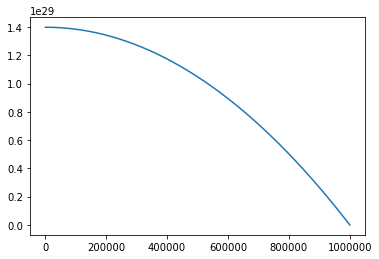

In [106]:
M = 12e31
R = 10e5
n = 1000000
r = np.linspace(R,0,n)
x=r[:]
y=P_theo(M,R,n)[:]

plt.plot(x,y)
plt.show()



In [115]:
def collapse_R(R):
  
    M_in=1e10
    
    while P_theo(M_in,R,n)[n-1] < 1e35:
        
        M_in = M_in*1e2
        collapse_Masse = M_in
        print(P_theo(M_in,R,n)[n-1])
    
    return collapse_Masse

In [116]:
collapse_R(6e8)

0.0
0.0
0.0
0.0
5.51415893368e-07
0.00617585800572
61.4332446803
614330.792668
6143307267.54
6.14332231771e+13
6.14482724643e+17
6.29938475866e+21
nan


/Users/virgiledandoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


1e+36

In [171]:
def collapse_M(M):
  
    R_in=1e10
    
    while P_theo(M,R_in,n)[n-1] < 1e35:
        
        R_in = (R_in)*10**(-1)
        collapse_Rayon = R_in
        print(P_theo(M,R_in,n)[n-1])
        R_S = (2*G*M)/(c**2)
    
    return (R_in,R_S)

In [172]:
collapse_M(2e30)

3.18469986525e+13
3.18478495338e+17
3.18563610093e+21
3.19417424019e+25
3.28231097865e+29
4.57158347623e+33
nan


/Users/virgiledandoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


(1000.0, 2968.5503495510543)